### Data Science and Business Analytics Internship

# Stock Market Prediction using Numerical and Textual Analysis

### Author: Hassan Ikram

### Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines 

In this task, we are going to analyze and predict the stock price of BSE SENSEX, which  is a free-float market-weighted stock market index of 30 well-established and financially sound companies listed on Bombay Stock Exchange.

## Importing Libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

# For Sentiment Analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Project is divided into three parts
1. **Textual Analysis / Sentiment Analysis:**
 We are going to use data from  https://bit.ly/36fFPI6, which a Times of India News dataset for sentiment analysis.

2. **Numerical Analysis:** 
  For Numerical Analysis, we are going to get data from https://finance.yahoo.com/, In numerical analysis we are going to analyze BSE SENSEX stock.
3. **Stock Market Price Prediction:**
    We are going to merge numerical dataset and the sentiment analysis scores and create a hybrid model to pedict the stock market price.

# 1. Textual / Sentiment Analysis

In [2]:
df = pd.read_csv('../india-news-headlines.csv')
df.head()


,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [3]:
## Checking the datatype and length of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [4]:
## Changing the publish_date into standard data and time format
df['date'] = pd.to_datetime(df['publish_date'],format= '%Y%m%d')

In [5]:
## Using the data on from 2011 and onward
df = df[(df['date'] > "2011-01-01")]

In [6]:
# Making a copy of the dataframe to make changes into it.
df_news = df.copy()
df_news

,publish_date,headline_category,headline_text,date
1024407,20110102,tech.computing,Technology wishlist for 2011,2011-01-02
1024408,20110102,city.patna,Air passengers a harassed lot,2011-01-02
1024409,20110102,entertainment.events.bangalore,Bangalore's chilled out New Year bash!,2011-01-02
1024410,20110102,entertainment.events.mumbai,Kapoor duo in celebration mode,2011-01-02
1024411,20110102,entertainment.hindi.bollywood,Salman's ready to help!,2011-01-02
...,...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india,2020-06-30
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...,2020-06-30
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...,2020-06-30
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...,2020-06-30


In [7]:
## Dropping the duplicate rows from the data
df_news.drop_duplicates(inplace=True)
df_news

,publish_date,headline_category,headline_text,date
1024407,20110102,tech.computing,Technology wishlist for 2011,2011-01-02
1024408,20110102,city.patna,Air passengers a harassed lot,2011-01-02
1024409,20110102,entertainment.events.bangalore,Bangalore's chilled out New Year bash!,2011-01-02
1024410,20110102,entertainment.events.mumbai,Kapoor duo in celebration mode,2011-01-02
1024411,20110102,entertainment.hindi.bollywood,Salman's ready to help!,2011-01-02
...,...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india,2020-06-30
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...,2020-06-30
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...,2020-06-30
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...,2020-06-30


In [8]:
# Droping publish_date and headline_category  from the data
df_news =df_news.drop(["publish_date", "headline_category"], axis=1)

In [9]:
df_news.head()

,headline_text,date
1024407,Technology wishlist for 2011,2011-01-02
1024408,Air passengers a harassed lot,2011-01-02
1024409,Bangalore's chilled out New Year bash!,2011-01-02
1024410,Kapoor duo in celebration mode,2011-01-02
1024411,Salman's ready to help!,2011-01-02


### Grouping the headlines for each day

Grouping each headline_text of a day into a single column

In [10]:
df_news['headline_text'] = df_news.groupby(['date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,headline_text,date
0,Technology wishlist for 2011 Air passengers a ...,2011-01-02
1,Photo Gallery (Ashes 2010) Your guy needs comp...,2011-01-03
2,Deepika Padukone Deepika Padukone Imran invite...,2011-01-04
3,Man dies of heart attack after killing lover's...,2011-01-05
4,Photo Gallery (Indian tour of South Africa) Ra...,2011-01-06
...,...,...
3463,Containment zone residents slam high prices ch...,2020-06-26
3464,like me i wont let you have a toxic relationsh...,2020-06-27
3465,Atanu Ghosh plans to rewrite old scripts to ma...,2020-06-28
3466,6 hot and stylish bikini looks of Katrina Kaif...,2020-06-29


### Tokenize and remove stop words

In [11]:
def preprocess_headlines(headline):
    stop_words = stopwords.words('english')
    tokenize = []
    result = ""
    tokens = word_tokenize(headline) 
    for i in tokens:
        if i.lower() not in stop_words:
            result += " " + i.lower()
    return result 
        

In [12]:
df_news["headline_text"] = [preprocess_headlines(i) for i in df_news['headline_text']]

### Getting  Subjectivity  & Polarity from headline_text 

In [13]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [14]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['headline_text'].apply(getSubjectivity)
df_news['Polarity'] = df_news['headline_text'].apply(getPolarity)
df_news

,headline_text,date,Subjectivity,Polarity
0,technology wishlist 2011 air passengers haras...,2011-01-02,0.420696,0.052225
1,photo gallery ( ashes 2010 ) guy needs compli...,2011-01-03,0.375598,0.061099
2,deepika padukone deepika padukone imran invit...,2011-01-04,0.391273,0.019847
3,man dies heart attack killing lover 's hubby ...,2011-01-05,0.420299,0.010189
4,photo gallery ( indian tour south africa ) ra...,2011-01-06,0.389732,0.020557
...,...,...,...,...
3463,containment zone residents slam high prices c...,2020-06-26,0.364023,0.043772
3464,like wont let toxic relationship food major r...,2020-06-27,0.381440,0.068239
3465,atanu ghosh plans rewrite old scripts make re...,2020-06-28,0.399849,0.037077
3466,6 hot stylish bikini looks katrina kaif anna ...,2020-06-29,0.378767,0.041490


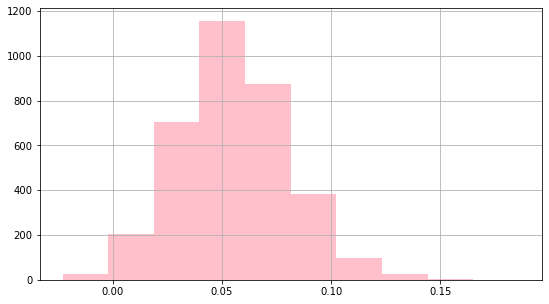

In [15]:
plt.figure(figsize = (9,5))
df_news['Polarity'].hist(color = 'pink')

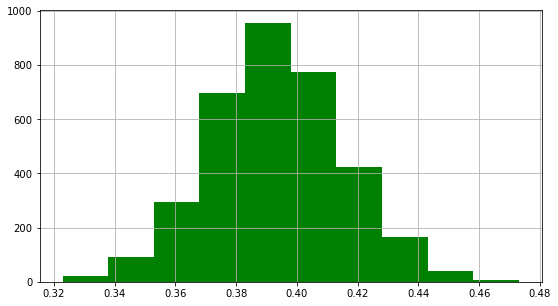

In [16]:
plt.figure(figsize = (9,5))
df_news['Subjectivity'].hist(color = 'green')

### Adding Sentiment Scores to df_news

In [17]:
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['headline_text']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['headline_text']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['headline_text']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['headline_text']]
df_news

,headline_text,date,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,technology wishlist 2011 air passengers haras...,2011-01-02,0.420696,0.052225,-0.9999,0.195,0.696,0.109
1,photo gallery ( ashes 2010 ) guy needs compli...,2011-01-03,0.375598,0.061099,-0.9997,0.178,0.710,0.112
2,deepika padukone deepika padukone imran invit...,2011-01-04,0.391273,0.019847,-0.9998,0.174,0.717,0.108
3,man dies heart attack killing lover 's hubby ...,2011-01-05,0.420299,0.010189,-0.9999,0.189,0.701,0.109
4,photo gallery ( indian tour south africa ) ra...,2011-01-06,0.389732,0.020557,-0.9998,0.159,0.741,0.100
...,...,...,...,...,...,...,...,...
3463,containment zone residents slam high prices c...,2020-06-26,0.364023,0.043772,-0.9998,0.155,0.753,0.092
3464,like wont let toxic relationship food major r...,2020-06-27,0.381440,0.068239,-0.9998,0.148,0.759,0.093
3465,atanu ghosh plans rewrite old scripts make re...,2020-06-28,0.399849,0.037077,-0.9999,0.157,0.760,0.083
3466,6 hot stylish bikini looks katrina kaif anna ...,2020-06-29,0.378767,0.041490,-0.9998,0.152,0.760,0.088


# 2. Numerical Analysis

Now we are going to analyze the historical stock price dataset

In [109]:
stock_df = pd.read_csv('BSESN.csv')
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,20621.609375,20664.800781,20531.000000,20561.050781,20561.050781,12000.0
1,2011-01-04,20617.380859,20651.210938,20449.009766,20498.720703,20498.720703,15200.0
2,2011-01-05,20509.949219,20509.949219,20243.949219,20301.099609,20301.099609,14400.0
3,2011-01-06,20395.500000,20425.849609,20107.169922,20184.740234,20184.740234,16600.0
4,2011-01-07,20163.849609,20210.619141,19629.220703,19691.810547,19691.810547,15800.0


In [110]:
# General info
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2455 non-null   object 
 1   Open       2438 non-null   float64
 2   High       2438 non-null   float64
 3   Low        2438 non-null   float64
 4   Close      2438 non-null   float64
 5   Adj Close  2438 non-null   float64
 6   Volume     2438 non-null   float64
dtypes: float64(6), object(1)
memory usage: 134.4+ KB


In [111]:
# Summary Stats
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03
mean,27534.990383,27672.280174,27340.152603,27499.768572,27499.768572,1.439943e+05
std,7700.982133,7722.415079,7653.057429,7687.470434,7687.470434,1.513235e+06
min,15436.120117,15440.099609,15135.860352,15175.080078,15175.080078,2.500000e+03
25%,19723.430176,19820.339844,19621.708008,19698.077149,19698.077149,9.500000e+03
50%,27251.379883,27389.254882,27123.465820,27249.129882,27249.129882,1.200000e+04
75%,34203.609375,34456.069336,33999.981445,34190.496094,34190.496094,1.687500e+04
max,45999.421875,46164.101563,45792.011719,46103.500000,46103.500000,3.181510e+07


In [112]:
stock_df['date'] = pd.to_datetime(stock_df['Date'], infer_datetime_format=True)
stock_df = stock_df.drop('Date', axis=1)

In [113]:
# Dropping null values
stock_df = stock_df.dropna() 

Text(0.5, 1.0, 'SENSEX')

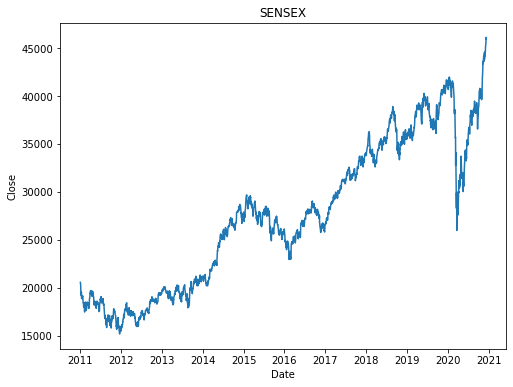

In [114]:
# Let's see a historical view of the closing price
plt.figure(figsize=(8, 6))
plt.plot( stock_df['date'],stock_df['Close'])
plt.ylabel('Close')
plt.xlabel('Date')
plt.title("SENSEX")

Text(0.5, 1.0, 'SENSEX')

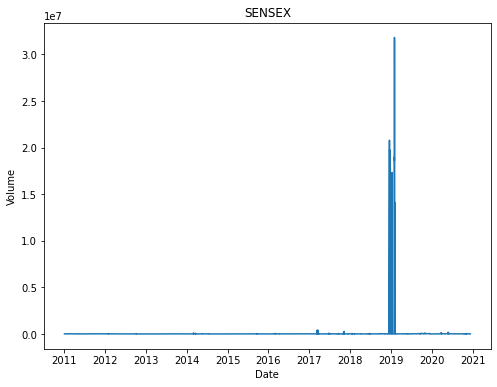

In [115]:
# Let's see a historical view of total Volume being traded everyday
plt.figure(figsize=(8, 6))
plt.plot( stock_df['date'],stock_df['Volume'])
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title("SENSEX")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020149F09040>,
      dtype=object)

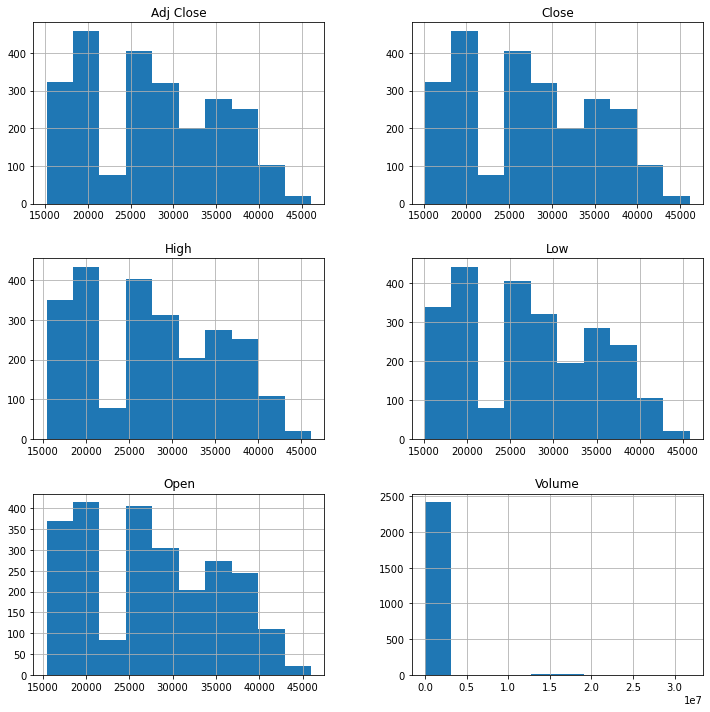

In [116]:
stock_df.hist(figsize=(12,12))

Text(0.5, 0, 'Days')

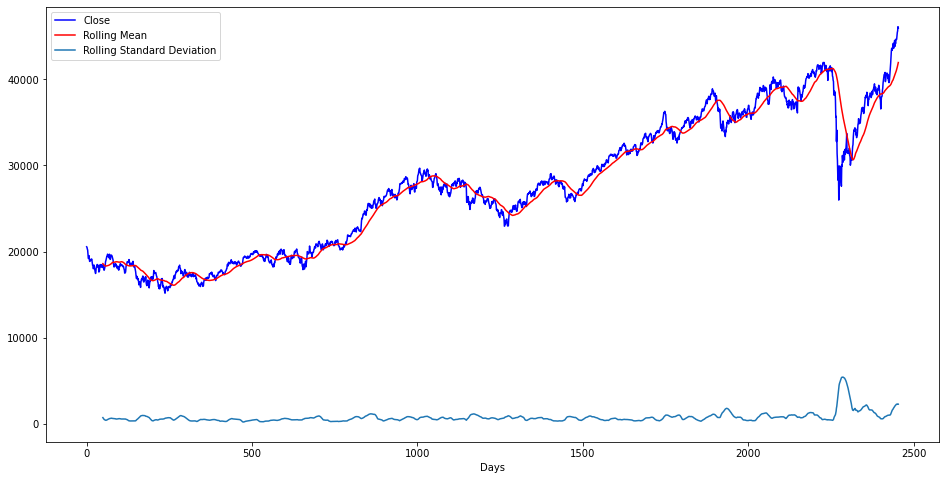

In [415]:
#Plotting moving average
close = stock_df['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(16, 8))
stock_df['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()
plt.xlabel('Days')

### Cheking Daily return
We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock

Text(0.5, 1.0, 'SENSEX')

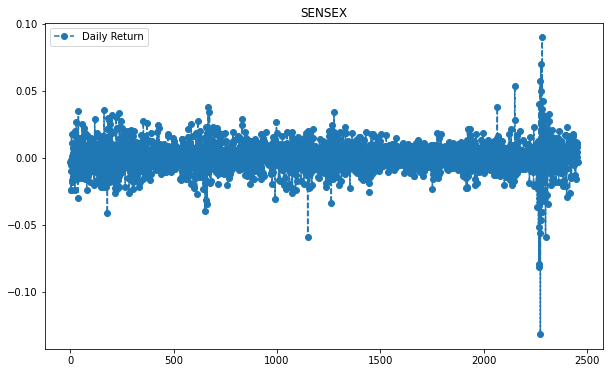

In [118]:
# We'll use pct_change to find the percent change for each day
stock_df['Daily Return'] = stock_df['Adj Close'].pct_change()
plt.figure(figsize=(10, 6))
stock_df['Daily Return'].plot( legend=True, linestyle='--', marker='o')
plt.title("SENSEX")

Text(0.5, 1.0, 'SENSEX')

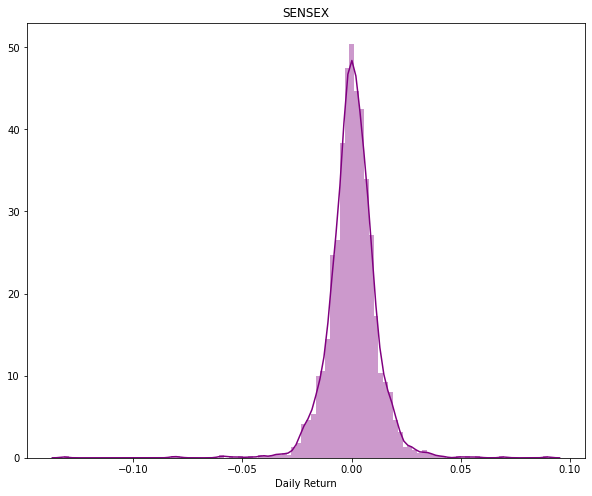

In [119]:
plt.figure(figsize=(10,8))
sns.distplot(stock_df['Daily Return'].dropna(), bins=100, color='purple')
plt.xlabel('Daily Return')
plt.title("SENSEX")

In [120]:
# Checking the moving avergae of SENSEX stock price for 10, 20 and 50 days
MA_day = [10, 20, 50]

for ma in MA_day:
    column_name = f"MA for {ma} days"
    stock_df[column_name] = stock_df['Adj Close'].rolling(ma).mean()

Text(0.5, 0, 'Days')

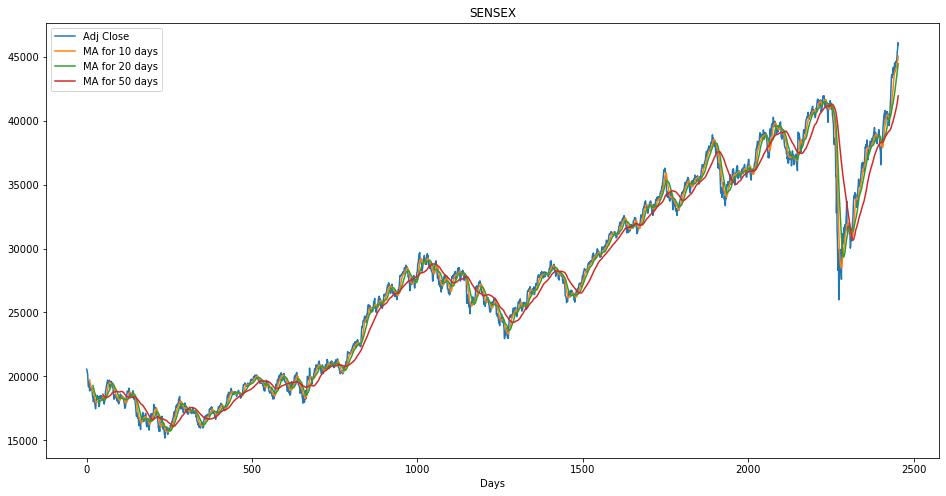

In [414]:
stock_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(16, 8))
plt.title('SENSEX')
plt.xlabel('Days')

# 3. Merging the Datasets and creating Hybrid model

### Merging Stock DataFrame and News Analysis DataFrame  

In [122]:
df_merge = pd.merge(stock_df, df_news, how='inner', on='date')
df_merge.head()

,Open,High,Low,Close,Adj Close,Volume,date,Daily Return,MA for 10 days,MA for 20 days,MA for 50 days,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,20621.609375,20664.800781,20531.000000,20561.050781,20561.050781,12000.0,2011-01-03,NaN,NaN,NaN,NaN,photo gallery ( ashes 2010 ) guy needs compli...,0.375598,0.061099,-0.9997,0.178,0.710,0.112
1,20617.380859,20651.210938,20449.009766,20498.720703,20498.720703,15200.0,2011-01-04,-0.003031,NaN,NaN,NaN,deepika padukone deepika padukone imran invit...,0.391273,0.019847,-0.9998,0.174,0.717,0.108
2,20509.949219,20509.949219,20243.949219,20301.099609,20301.099609,14400.0,2011-01-05,-0.009641,NaN,NaN,NaN,man dies heart attack killing lover 's hubby ...,0.420299,0.010189,-0.9999,0.189,0.701,0.109
3,20395.500000,20425.849609,20107.169922,20184.740234,20184.740234,16600.0,2011-01-06,-0.005732,NaN,NaN,NaN,photo gallery ( indian tour south africa ) ra...,0.389732,0.020557,-0.9998,0.159,0.741,0.100
4,20163.849609,20210.619141,19629.220703,19691.810547,19691.810547,15800.0,2011-01-07,-0.024421,NaN,NaN,NaN,rishi gives look test kjo tom hanks honoured ...,0.393698,0.017528,-0.9996,0.148,0.749,0.103


In [123]:
# setting column 'Date' as the index column
df_merge.set_index('date', inplace= True)

### Dropping unimportant columns

In [357]:
dataframe = df_merge.drop(["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days", "Daily Return", "headline_text"], axis=1)
dataframe.head()


,Open,High,Low,Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
date,,,,,,,,,,,
2011-01-03,20621.609375,20664.800781,20531.000000,20561.050781,12000.0,0.375598,0.061099,-0.9997,0.178,0.710,0.112
2011-01-04,20617.380859,20651.210938,20449.009766,20498.720703,15200.0,0.391273,0.019847,-0.9998,0.174,0.717,0.108
2011-01-05,20509.949219,20509.949219,20243.949219,20301.099609,14400.0,0.420299,0.010189,-0.9999,0.189,0.701,0.109
2011-01-06,20395.500000,20425.849609,20107.169922,20184.740234,16600.0,0.389732,0.020557,-0.9998,0.159,0.741,0.100
2011-01-07,20163.849609,20210.619141,19629.220703,19691.810547,15800.0,0.393698,0.017528,-0.9996,0.148,0.749,0.103


In [358]:
## Checking the co-relationship between features and the target variable Label in the dataframe
dataframe.corr()

,Open,High,Low,Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Open,1.000000,0.999725,0.999653,0.999390,0.110459,-0.042627,-0.166843,-0.001805,-0.090798,0.389565,-0.342634
High,0.999725,1.000000,0.999471,0.999704,0.110591,-0.042449,-0.166850,-0.001595,-0.091503,0.391538,-0.344074
Low,0.999653,0.999471,1.000000,0.999684,0.110797,-0.042489,-0.166499,-0.001425,-0.091212,0.388526,-0.340973
Close,0.999390,0.999704,0.999684,1.000000,0.110792,-0.042623,-0.166805,-0.000897,-0.091328,0.389814,-0.342288
Volume,0.110459,0.110591,0.110797,0.110792,1.000000,0.009818,-0.057847,-0.012582,0.009227,0.062229,-0.081894
Subjectivity,-0.042627,-0.042449,-0.042489,-0.042623,0.009818,1.000000,0.265859,0.077157,-0.155557,-0.113988,0.308168
Polarity,-0.166843,-0.166850,-0.166499,-0.166805,-0.057847,0.265859,1.000000,0.252155,-0.437264,-0.097168,0.613236
Compound,-0.001805,-0.001595,-0.001425,-0.000897,-0.012582,0.077157,0.252155,1.000000,-0.312757,0.010020,0.348599
Negative,-0.090798,-0.091503,-0.091212,-0.091328,0.009227,-0.155557,-0.437264,-0.312757,1.000000,-0.618842,-0.440472
Neutral,0.389565,0.391538,0.388526,0.389814,0.062229,-0.113988,-0.097168,0.010020,-0.618842,1.000000,-0.432004


### Data Preparation

In [ ]:
data_to_use = (len(dataframe)-1)

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(dataframe)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

In [ ]:
# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
open_price = dataframe.iloc[start:total_data,0] #open
high = dataframe.iloc[start:total_data,1] #high
low = dataframe.iloc[start:total_data,2] #low
close_price = dataframe.iloc[start:total_data,3] #close
volume = dataframe.iloc[start:total_data,4] #volume
#subjectivety = dataframe.iloc[start:total_data, 5] #subjectivety
polarity = dataframe.iloc[start:total_data, 6] #polarity
compound = dataframe.iloc[start:total_data,7] #compound
#negative = dataframe.iloc[start:total_data,8] #neg
#neutral = dataframe.iloc[start:total_data,9] #neu
#positive = dataframe.iloc[start:total_data,10] #pos


In [401]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, polarity, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted', 'polarity','volume', 'open_price', 'high', 'low']

data.tail()

,close_price,close_price_shifted,compound,compound_shifted,polarity,volume,open_price,high,low
date,,,,,,,,,
2020-06-24,34868.980469,34842.101563,-0.9997,-0.9999,0.069655,26600.0,35679.738281,35706.550781,34794.929688
2020-06-25,34842.101563,35171.269531,-0.9999,-0.9998,0.003321,24600.0,34525.390625,35081.609375,34499.781250
2020-06-26,35171.269531,34961.519531,-0.9998,-0.9998,0.043772,24800.0,35144.781250,35254.878906,34910.339844
2020-06-29,34961.519531,34915.800781,-0.9998,-0.9998,0.041490,18300.0,34926.949219,35032.359375,34662.058594
2020-06-30,34915.800781,NaN,-0.9998,NaN,0.056746,18500.0,35168.300781,35233.910156,34812.800781


In [402]:
data = data.dropna()

### Setting the Target Variable and the Feature Dataset¶

In [403]:
X = data.drop('close_price_shifted',axis=1)
X

,close_price,compound,compound_shifted,polarity,volume,open_price,high,low
date,,,,,,,,
2011-01-04,20498.720703,-0.9998,-0.9999,0.019847,15200.0,20617.380859,20651.210938,20449.009766
2011-01-05,20301.099609,-0.9999,-0.9998,0.010189,14400.0,20509.949219,20509.949219,20243.949219
2011-01-06,20184.740234,-0.9998,-0.9996,0.020557,16600.0,20395.500000,20425.849609,20107.169922
2011-01-07,19691.810547,-0.9996,-0.9997,0.017528,15800.0,20163.849609,20210.619141,19629.220703
2011-01-10,19224.119141,-0.9997,-0.9997,0.028174,17200.0,19714.419922,19720.429688,19158.429688
...,...,...,...,...,...,...,...,...
2020-06-23,35430.429688,-0.9998,-0.9997,0.045369,25200.0,35015.730469,35482.160156,34843.691406
2020-06-24,34868.980469,-0.9997,-0.9999,0.069655,26600.0,35679.738281,35706.550781,34794.929688
2020-06-25,34842.101563,-0.9999,-0.9998,0.003321,24600.0,34525.390625,35081.609375,34499.781250


In [404]:
y = data['close_price_shifted']
y

date
2011-01-04    20301.099609
2011-01-05    20184.740234
2011-01-06    19691.810547
2011-01-07    19224.119141
2011-01-10    19196.339844
                  ...     
2020-06-23    34868.980469
2020-06-24    34842.101563
2020-06-25    35171.269531
2020-06-26    34961.519531
2020-06-29    34915.800781
Name: close_price_shifted, Length: 2322, dtype: float64

### Scaling the Target Variable and the Feature Dataset

In [405]:
# scaling the feature dataset
scaler_X = MinMaxScaler (feature_range=(-1, 1))
X = np.array(X).reshape((len(X) ,X.shape[1]))
X = scaler_X.fit_transform(X)

# scaling the target variable
scaler_y = MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
X, y

(array([[-0.60238029, -0.99979999, -0.99989999, ..., -0.61372618,
         -0.61160053, -0.60222624],
        [-0.6171405 , -0.99989999, -0.99979999, ..., -0.62173543,
         -0.62212918, -0.61757828],
        [-0.62583131, -0.99979999, -0.99959998, ..., -0.63026786,
         -0.62839737, -0.62781839],
        ...,
        [ 0.46891873, -0.99989999, -0.99979999, ...,  0.42314504,
          0.46393956,  0.44969755],
        [ 0.4935041 , -0.99979999, -0.99979999, ...,  0.46932191,
          0.47685385,  0.48043439],
        [ 0.47783799, -0.99979999, -0.99979999, ...,  0.45308207,
          0.46026881,  0.46184659]]),
 array([[-0.6171405 ],
        [-0.62583131],
        [-0.66264795],
        ...,
        [ 0.4935041 ],
        [ 0.47783799],
        [ 0.47442328]]))

### Dividing the dataset into Training and Test

In [406]:
# preparing training and test dataset
X_train = X[0 : train_end,]
X_test = X[train_end+1 : len(X),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)


Number of rows and columns in the Training set X: (1858, 8) and y: (1858, 1)
Number of rows and columns in the Test set X: (463, 8) and y: (463, 1)


### Reshaping the Feature Dataset

In [407]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)


Shape of Training set X: (1858, 8, 1)
Shape of Test set X: (463, 8, 1)


### Hybrid Model

In [408]:
np.random.seed(256)

model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(X.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 8, 100)            40800     
_________________________________________________________________
dropout_60 (Dropout)         (None, 8, 100)            0         
_________________________________________________________________
lstm_61 (LSTM)               (None, 8, 100)            80400     
_________________________________________________________________
dropout_61 (Dropout)         (None, 8, 100)            0         
_________________________________________________________________
lstm_62 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_62 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)               

In [409]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=12, batch_size=8, verbose=1)

Epoch 1/12
186/186 [==============================] - 6s 33ms/step - loss: 0.0488 - val_loss: 0.1677
Epoch 2/12
186/186 [==============================] - 3s 19ms/step - loss: 0.0184 - val_loss: 0.0710
Epoch 3/12
186/186 [==============================] - 3s 18ms/step - loss: 0.0038 - val_loss: 0.0157
Epoch 4/12
186/186 [==============================] - 4s 21ms/step - loss: 0.0020 - val_loss: 0.0053
Epoch 5/12
186/186 [==============================] - 5s 25ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 6/12
186/186 [==============================] - 5s 27ms/step - loss: 0.0016 - val_loss: 7.5988e-04
Epoch 7/12
186/186 [==============================] - 10s 54ms/step - loss: 0.0014 - val_loss: 4.0912e-04
Epoch 8/12
186/186 [==============================] - 8s 41ms/step - loss: 0.0016 - val_loss: 3.5766e-04
Epoch 9/12
186/186 [==============================] - 13s 69ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/12
186/186 [==============================] - 16s 85ms/step - loss: 

### Predictions

In [410]:
# performing predictions
predictions = model.predict(X_test) 


# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:10]

Predictions:


array([[37561.8  ],
       [37555.383],
       [37621.332],
       [37515.152],
       [37520.023],
       [37808.438],
       [37820.74 ],
       [37822.582],
       [38084.086],
       [38038.035]], dtype=float32)

### Model Evaluation

In [411]:
# calculating the training set mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test set mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test sets mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

463/463 [==============================] - 6s 14ms/step - loss: 0.0032
Train Loss = 0.0005
Test Loss = 0.0032


### Visualizing the predictions and test set closing price

In [412]:
# unscaling the test feature dataset, x_test
X_test = scaler_X.inverse_transform(np.array(X_test).reshape((len(X_test), X_test.shape[1])))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

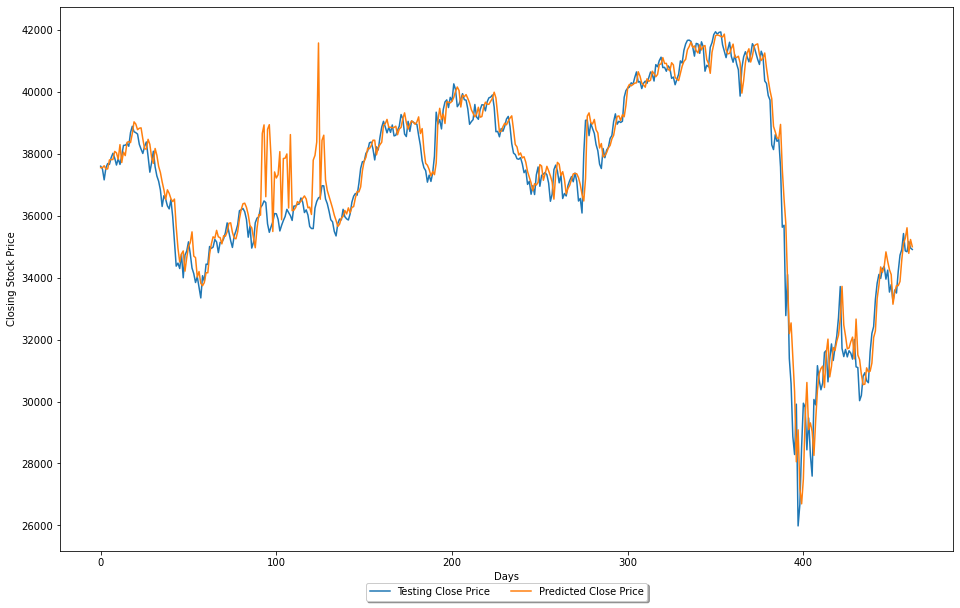

In [413]:
# plotting
plt.figure(figsize=(16,10))
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.xlabel('Days')
plt.ylabel('Closing Stock Price')
plt.show()